# Radimp check

In [19]:
using CSV
using DataFrames
using Plots
using StatPlots

pyplot()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1186
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1186
┌ Info: Precompiling IterableTables [1c8ee90f-4401-5389-894e-7a04a3dc0f4d]
└ @ Base loading.jl:1186
┌ Info: Precompiling Widgets [cc8bc4a8-27d6-5769-a93b-9d913e69aa62]
└ @ Base loading.jl:1186
┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1186
┌ Info: Precompiling KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1186


Plots.PyPlotBackend()

Compare with C version calculation.

Diameter is 0.25(m), PIPE type end correction.
Temperature = 24.0 degC.

## C (kanutils/radimp)

This is a benchmark data.
Calculated by C version of radimp.

In [11]:
radc = CSV.read("../sample/radimp_test.txt", header = 0 );

In [12]:
rename!(radc, :Column1 => :frq, :Column2=>:rel,:Column3=>:img);

,frq,rel,img
1,0.0,NaN,NaN
2,2.5,0.067502,28.2465
3,5.0,0.270002,56.4916
4,7.5,0.607489,84.7337
5,10.0,1.07994,112.971
6,12.5,1.68732,141.203
7,15.0,2.4296,169.428
8,17.5,3.30673,197.644
9,20.0,4.31865,225.85
10,22.5,5.46528,254.044


In [15]:
radc = radc[2:end,:];

,frq,rel,img
1,2.5,0.067502,28.2465
2,5.0,0.270002,56.4916
3,7.5,0.607489,84.7337
4,10.0,1.07994,112.971
5,12.5,1.68732,141.203
6,15.0,2.4296,169.428
7,17.5,3.30673,197.644
8,20.0,4.31865,225.85
9,22.5,5.46528,254.044
10,25.0,6.74658,282.225


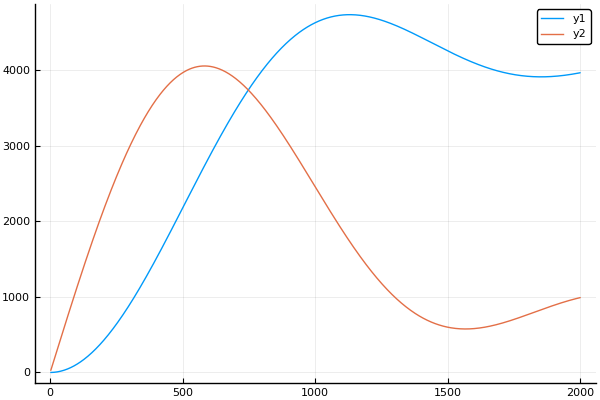

In [21]:
@df radc plot(:frq,[:rel,:img])

## Julia

Use module Mensur subroutine.

In [45]:
include("../mensur.jl")

Main.Mensur

In [46]:
import .Mensur

In [24]:
#default calc params
params = Dict([
        "minfreq"=>0.0,
        "maxfreq"=>2000.0,
        "stepfreq"=>2.5,
        "temperature"=>24.0,
        "radiation"=>"PIPE",
        "output"=>"",
        "version"=>false,
        "help"=>false
    ])

Dict{String,Any} with 8 entries:
  "maxfreq"     => 2000.0
  "output"      => ""
  "stepfreq"    => 2.5
  "help"        => false
  "minfreq"     => 0.0
  "version"     => false
  "temperature" => 24.0
  "radiation"   => "PIPE"

Update parameters with values above.

In [25]:
Mensur.update_calcparams!(params)

1.4714045207910316

In [26]:
params

Dict{String,Any} with 14 entries:
  "dmp"         => 1.4714
  "nu"          => 1.52753e-5
  "output"      => ""
  "temperature" => 24.0
  "mu"          => 1.81544e-5
  "stepfreq"    => 2.5
  "minfreq"     => 0.0
  "version"     => false
  "rhoc0"       => 410.862
  "maxfreq"     => 2000.0
  "help"        => false
  "rho"         => 1.18848
  "c0"          => 345.704
  "radiation"   => "PIPE"

In [41]:
# wave freq
wf = radc[:frq] .* (2pi);

In [29]:
zo = zeros(Complex,length(wf));

800-element Array{Complex,1}:
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
   ⋮    
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im

Let us calculate 'PIPE' type radiation impedance. 

In [47]:
for i in 1:length(wf)
    zo[i] = Mensur.radimp(wf[i],0.25,params)
end

In [48]:
radj = DataFrame(frq = radc[:frq], rel = real.(zo), img = imag.(zo))

,frq,rel,img
1,2.5,0.0675017,28.2465
2,5.0,0.270002,56.4916
3,7.5,0.607489,84.7337
4,10.0,1.07994,112.971
5,12.5,1.68732,141.203
6,15.0,2.4296,169.428
7,17.5,3.30673,197.644
8,20.0,4.31864,225.85
9,22.5,5.46529,254.044
10,25.0,6.74658,282.225


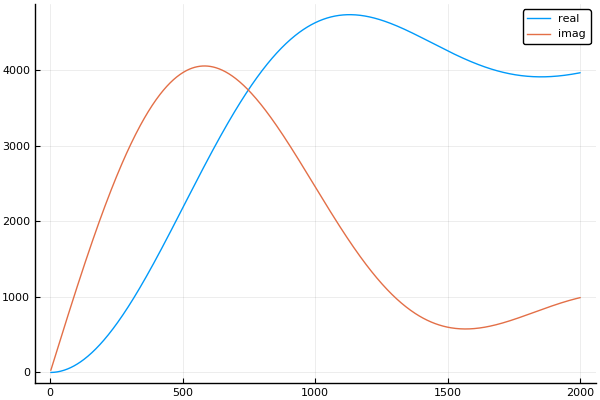

In [49]:
@df radj plot(:frq,[:rel,:img], label = ["real" "imag"])

## Comparison

In [52]:
radc[:rjulia] = radj[:rel];
radc[:ijulia] = radj[:img];
head(radc)

,frq,rel,img,rjulia,ijulia
1,2.5,0.067502,28.2465,0.0675017,28.2465
2,5.0,0.270002,56.4916,0.270002,56.4916
3,7.5,0.607489,84.7337,0.607489,84.7337
4,10.0,1.07994,112.971,1.07994,112.971
5,12.5,1.68732,141.203,1.68732,141.203
6,15.0,2.4296,169.428,2.4296,169.428


In [53]:
tail(radc)

,frq,rel,img,rjulia,ijulia
1,1987.5,3961.09,980.644,3961.09,980.644
2,1990.0,3962.7,982.825,3962.7,982.825
3,1992.5,3964.32,984.978,3964.32,984.978
4,1995.0,3965.97,987.102,3965.97,987.102
5,1997.5,3967.65,989.197,3967.65,989.197
6,2000.0,3969.34,991.263,3969.34,991.263


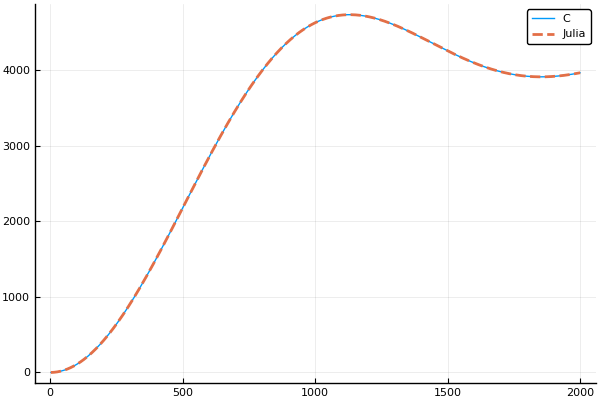

In [58]:
@df radc plot(:frq,[:rel, :rjulia], label=["C" "Julia"], line=[:solid :dash], w = [1 2])

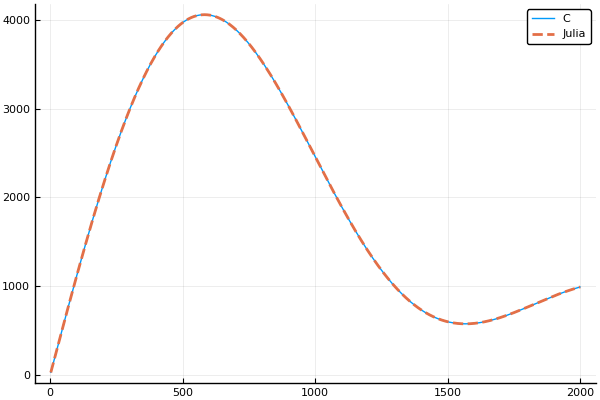

In [59]:
@df radc plot(:frq,[:img, :ijulia], label=["C" "Julia"], line=[:solid :dash], w = [1 2])

OK.
Results are same.